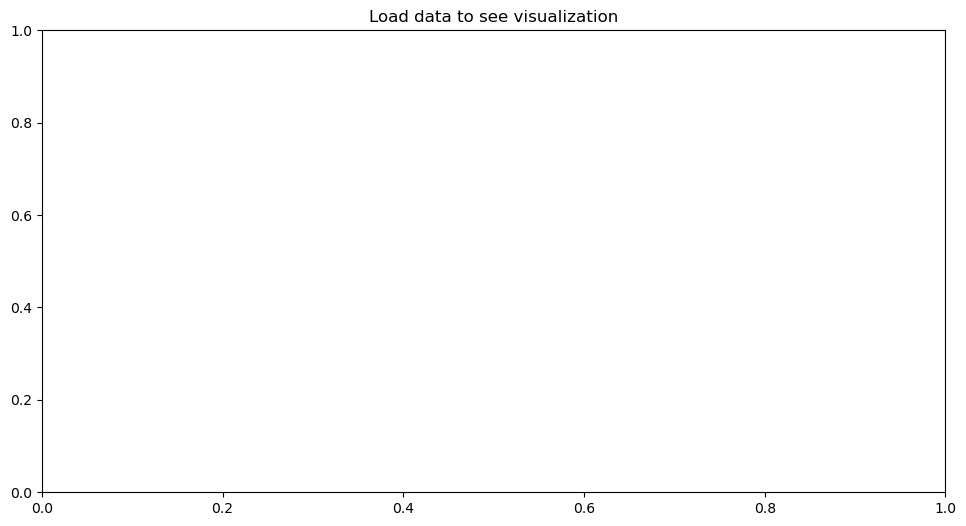

In [2]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import csv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import pandas as pd

class FieldZone:
    def __init__(self, crop, nitrogen, phosphorus, potassium, pH, rainfall, temperature):
        self.crop = crop
        self.nitrogen = float(nitrogen)
        self.phosphorus = float(phosphorus)
        self.potassium = float(potassium)
        self.pH = float(pH)
        self.rainfall = float(rainfall)
        self.temperature = float(temperature)

    def display_info(self):
        return f"Crop: {self.crop} | N: {self.nitrogen} | P: {self.phosphorus} | K: {self.potassium} | pH: {self.pH} | Rainfall: {self.rainfall} | Temperature: {self.temperature}"


class SoilNutrientTracker:
    def __init__(self):
        self.data = []
        self.num_zones = 0
        self.parameter_names = ["Nitrogen", "Phosphorus", "Potassium", "pH", "Rainfall", "Temperature"]
        self.num_parameters = len(self.parameter_names)

    def load_data(self, file_path):    #O(n)
        try:
            self.data = []
            self.num_zones = 0
            with open(file_path, 'r') as file:
                reader = csv.reader(file)
                header = next(reader)  # Skip header
                for row in reader:
                    if len(row) >= 8:  # Ensure we have enough columns
                        zone = FieldZone(
                            row[1],  # crop
                            float(row[2]),  # nitrogen
                            float(row[3]),  # phosphorus
                            float(row[4]),  # potassium
                            float(row[5]),  # pH
                            float(row[6]),  # rainfall
                            float(row[7])   # temperature
                        )
                        self.data.append(zone)
                        self.num_zones += 1
            return True, f"Data loaded successfully! {self.num_zones} zones found."
        except Exception as e:
            return False, f"Error reading file: {e}"

    def update_value(self, zone_index, parameter_index, value):
        if 0 <= zone_index < self.num_zones and 0 <= parameter_index < self.num_parameters:
            zone = self.data[zone_index]
            try:
                value = float(value)
                if parameter_index == 0:
                    zone.nitrogen = value
                elif parameter_index == 1:
                    zone.phosphorus = value
                elif parameter_index == 2:
                    zone.potassium = value
                elif parameter_index == 3:
                    zone.pH = value
                elif parameter_index == 4:
                    zone.rainfall = value
                elif parameter_index == 5:
                    zone.temperature = value
                return True, f"Value updated for zone {zone_index+1}, parameter {self.parameter_names[parameter_index]}."
            except ValueError:
                return False, "Please enter a valid number."
        else:
            return False, "Invalid zone index or parameter index."

    def get_value(self, zone_index, parameter_index):
        if 0 <= zone_index < self.num_zones and 0 <= parameter_index < self.num_parameters:
            zone = self.data[zone_index]
            if parameter_index == 0:
                return zone.nitrogen
            elif parameter_index == 1:
                return zone.phosphorus
            elif parameter_index == 2:
                return zone.potassium
            elif parameter_index == 3:
                return zone.pH
            elif parameter_index == 4:
                return zone.rainfall
            elif parameter_index == 5:
                return zone.temperature
        return None

    def trend_analysis(self):     #O(n)
        if not self.data:
            return "No data loaded. Please load data first."
            
        high_nitrogen_zones = [zone for zone in self.data if zone.nitrogen > 100]
        optimal_pH_zones = [zone for zone in self.data if 6.0 <= zone.pH <= 7.5]
        
        analysis = "Trend Analysis:\n"
        analysis += f"Zones with high nitrogen (>100): {len(high_nitrogen_zones)}\n"
        analysis += f"Zones with optimal pH (6.0-7.5): {len(optimal_pH_zones)}\n"
        
        return analysis

    def generate_report(self):     #O(n)
        if not self.data:
            return "No data loaded. Please load data first."
            
        high_nitrogen_zones = [zone for zone in self.data if zone.nitrogen > 100]
        optimal_pH_zones = [zone for zone in self.data if 6.0 <= zone.pH <= 7.5]

        report = "\nSoil Nutrient Report:\n"
        report += f"Total number of zones: {self.num_zones}\n"
        report += f"Zones with high nitrogen (>100): {len(high_nitrogen_zones)}\n"
        report += f"Zones with optimal pH (6.0-7.5): {len(optimal_pH_zones)}\n"
        report += "Actionable Insights:\n"
        report += "1. Consider reducing nitrogen levels in high nitrogen zones.\n"
        report += "2. Zones with optimal pH levels are ideal for a variety of crops."
        
        return report
    
    def get_crop_list(self):    #O(n logn)
        if not self.data:
            return []
        return sorted(list(set(zone.crop for zone in self.data)))
    
    def get_zones_by_crop(self, crop_name):     #O(n)
        return [i for i, zone in enumerate(self.data) if zone.crop == crop_name]
    
    def get_data_for_plots(self):      #O(n)
        if not self.data:
            return None
            
        # Calculate averages by crop type
        crop_data = {}
        for zone in self.data:
            if zone.crop not in crop_data:
                crop_data[zone.crop] = {
                    'count': 0,
                    'nitrogen': 0,
                    'phosphorus': 0,
                    'potassium': 0,
                    'pH': 0,
                    'rainfall': 0,
                    'temperature': 0
                }
            
            crop_data[zone.crop]['count'] += 1
            crop_data[zone.crop]['nitrogen'] += zone.nitrogen
            crop_data[zone.crop]['phosphorus'] += zone.phosphorus
            crop_data[zone.crop]['potassium'] += zone.potassium
            crop_data[zone.crop]['pH'] += zone.pH
            crop_data[zone.crop]['rainfall'] += zone.rainfall
            crop_data[zone.crop]['temperature'] += zone.temperature
        
        # Calculate averages
        for crop in crop_data:
            count = crop_data[crop]['count']
            if count > 0:
                crop_data[crop]['nitrogen'] /= count
                crop_data[crop]['phosphorus'] /= count
                crop_data[crop]['potassium'] /= count
                crop_data[crop]['pH'] /= count
                crop_data[crop]['rainfall'] /= count
                crop_data[crop]['temperature'] /= count
        
        return crop_data
    
    def export_data(self, file_path):    #O(n)
        if not self.data:
            return False, "No data to export"
            
        try:
            with open(file_path, 'w', newline='') as file:
                writer = csv.writer(file)
                # Write header
                writer.writerow(["Index", "Crop", "Nitrogen", "Phosphorus", "Potassium", "pH", "Rainfall", "Temperature"])
                
                # Write data
                for i, zone in enumerate(self.data):
                    writer.writerow([
                        i+1, 
                        zone.crop, 
                        zone.nitrogen, 
                        zone.phosphorus, 
                        zone.potassium, 
                        zone.pH, 
                        zone.rainfall, 
                        zone.temperature
                    ])
            return True, f"Data exported successfully to {file_path}"
        except Exception as e:
            return False, f"Error exporting data: {e}"


class SoilNutrientTrackerGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Soil Nutrient Tracker")
        self.root.geometry("1200x700")
        
        self.tracker = SoilNutrientTracker()
        self.current_file = None
        
        # Create main frame
        self.main_frame = ttk.Frame(root, padding="10")
        self.main_frame.pack(fill=tk.BOTH, expand=True)
        
        # Create menu
        self.create_menu()
        
        # Create tabs
        self.create_tabs()
        
        # Status bar
        self.status_var = tk.StringVar()
        self.status_var.set("Ready")
        self.status_bar = ttk.Label(root, textvariable=self.status_var, relief=tk.SUNKEN, anchor=tk.W)
        self.status_bar.pack(side=tk.BOTTOM, fill=tk.X)
    
    def create_menu(self):
        menu_bar = tk.Menu(self.root)
        
        # File menu
        file_menu = tk.Menu(menu_bar, tearoff=0)
        file_menu.add_command(label="Load Data", command=self.load_data)
        file_menu.add_separator()
        file_menu.add_command(label="Exit", command=self.root.quit)
        menu_bar.add_cascade(label="File", menu=file_menu)
        
        # Analysis menu
        analysis_menu = tk.Menu(menu_bar, tearoff=0)
        analysis_menu.add_command(label="Generate Report", command=self.show_report)
        analysis_menu.add_command(label="Trend Analysis", command=self.show_trend_analysis)
        menu_bar.add_cascade(label="Analysis", menu=analysis_menu)
        
        # Help menu
        help_menu = tk.Menu(menu_bar, tearoff=0)
        help_menu.add_command(label="About", command=self.show_about)
        menu_bar.add_cascade(label="Help", menu=help_menu)
        
        self.root.config(menu=menu_bar)
    
    def create_tabs(self):
        self.tab_control = ttk.Notebook(self.main_frame)
        
        # Data tab
        self.data_tab = ttk.Frame(self.tab_control)
        self.tab_control.add(self.data_tab, text="Data View")
        self.setup_data_tab()
        
        # Edit tab
        self.edit_tab = ttk.Frame(self.tab_control)
        self.tab_control.add(self.edit_tab, text="Edit Data")
        self.setup_edit_tab()
        
        # Visualization tab
        self.viz_tab = ttk.Frame(self.tab_control)
        self.tab_control.add(self.viz_tab, text="Visualization")
        self.setup_viz_tab()
        
        # Report tab
        self.report_tab = ttk.Frame(self.tab_control)
        self.tab_control.add(self.report_tab, text="Reports")
        self.setup_report_tab()
        
        self.tab_control.pack(expand=1, fill="both")
    
    def setup_data_tab(self):
        # Frame for controls
        control_frame = ttk.Frame(self.data_tab, padding="5")
        control_frame.pack(fill=tk.X)
        
        # Load button
        load_btn = ttk.Button(control_frame, text="Load Data", command=self.load_data)
        load_btn.pack(side=tk.LEFT, padx=5)
        
        # Filter frame
        filter_frame = ttk.LabelFrame(control_frame, text="Filter")
        filter_frame.pack(side=tk.LEFT, padx=10, fill=tk.X, expand=True)
        
        # Crop filter
        ttk.Label(filter_frame, text="Crop:").pack(side=tk.LEFT, padx=5)
        self.crop_filter_var = tk.StringVar()
        self.crop_filter = ttk.Combobox(filter_frame, textvariable=self.crop_filter_var, state="readonly")
        self.crop_filter.pack(side=tk.LEFT, padx=5)
        self.crop_filter.bind("<<ComboboxSelected>>", self.filter_data)
        
        # Clear filter button
        clear_filter_btn = ttk.Button(filter_frame, text="Clear Filter", command=self.clear_filter)
        clear_filter_btn.pack(side=tk.LEFT, padx=5)
        
        # Table frame
        table_frame = ttk.Frame(self.data_tab, padding="5")
        table_frame.pack(fill=tk.BOTH, expand=True)
        
        # Create treeview
        self.tree = ttk.Treeview(table_frame, columns=("Zone", "Crop", "N", "P", "K", "pH", "Rainfall", "Temp"), show="headings")
        
        # Set column headings
        self.tree.heading("Zone", text="Zone")
        self.tree.heading("Crop", text="Crop")
        self.tree.heading("N", text="Nitrogen")
        self.tree.heading("P", text="Phosphorus")
        self.tree.heading("K", text="Potassium")
        self.tree.heading("pH", text="pH")
        self.tree.heading("Rainfall", text="Rainfall")
        self.tree.heading("Temp", text="Temperature")
        
        # Set column widths
        self.tree.column("Zone", width=50)
        self.tree.column("Crop", width=100)
        self.tree.column("N", width=80)
        self.tree.column("P", width=80)
        self.tree.column("K", width=80)
        self.tree.column("pH", width=80)
        self.tree.column("Rainfall", width=80)
        self.tree.column("Temp", width=80)
        
        # Add scrollbar
        scrollbar = ttk.Scrollbar(table_frame, orient=tk.VERTICAL, command=self.tree.yview)
        self.tree.configure(yscroll=scrollbar.set)
        
        # Pack everything
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        self.tree.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
    
    def setup_edit_tab(self):
        # Zone selection frame
        zone_frame = ttk.LabelFrame(self.edit_tab, text="Select Zone")
        zone_frame.pack(fill=tk.X, padx=10, pady=10)
        
        ttk.Label(zone_frame, text="Zone Number:").grid(row=0, column=0, padx=5, pady=5)
        self.zone_var = tk.StringVar()
        self.zone_combo = ttk.Combobox(zone_frame, textvariable=self.zone_var, state="readonly")
        self.zone_combo.grid(row=0, column=1, padx=5, pady=5)
        self.zone_combo.bind("<<ComboboxSelected>>", self.load_zone_data)
        
        # Parameter edit frame
        edit_frame = ttk.LabelFrame(self.edit_tab, text="Edit Parameters")
        edit_frame.pack(fill=tk.BOTH, expand=True, padx=10, pady=10)
        
        # Labels and entry fields
        self.edit_vars = {}
        self.edit_entries = {}
        
        ttk.Label(edit_frame, text="Crop:").grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)
        self.crop_var = tk.StringVar()
        self.crop_entry = ttk.Entry(edit_frame, textvariable=self.crop_var, state="readonly")
        self.crop_entry.grid(row=0, column=1, padx=5, pady=5, sticky=tk.W+tk.E)
        
        params = ["Nitrogen", "Phosphorus", "Potassium", "pH", "Rainfall", "Temperature"]
        for i, param in enumerate(params):
            ttk.Label(edit_frame, text=f"{param}:").grid(row=i+1, column=0, padx=5, pady=5, sticky=tk.W)
            self.edit_vars[param] = tk.StringVar()
            self.edit_entries[param] = ttk.Entry(edit_frame, textvariable=self.edit_vars[param])
            self.edit_entries[param].grid(row=i+1, column=1, padx=5, pady=5, sticky=tk.W+tk.E)
        
        # Save button
        save_btn = ttk.Button(edit_frame, text="Save Changes", command=self.save_changes)
        save_btn.grid(row=len(params)+1, column=0, columnspan=2, pady=10)
    
    def setup_viz_tab(self):
        # Control frame
        control_frame = ttk.Frame(self.viz_tab, padding="5")
        control_frame.pack(fill=tk.X)
        
        # Plot type selection
        ttk.Label(control_frame, text="Plot Type:").pack(side=tk.LEFT, padx=5)
        self.plot_type_var = tk.StringVar(value="Bar Chart")
        plot_type_combo = ttk.Combobox(control_frame, textvariable=self.plot_type_var, 
                                       values=["Bar Chart"], 
                                       state="readonly")
        plot_type_combo.pack(side=tk.LEFT, padx=5)
        plot_type_combo.bind("<<ComboboxSelected>>", self.update_plot)
        
        # Parameter selection
        ttk.Label(control_frame, text="Parameter:").pack(side=tk.LEFT, padx=5)
        self.plot_param_var = tk.StringVar(value="Nitrogen")
        plot_param_combo = ttk.Combobox(control_frame, textvariable=self.plot_param_var, 
                                       values=["Nitrogen", "Phosphorus", "Potassium", "pH", "Rainfall", "Temperature"], 
                                       state="readonly")
        plot_param_combo.pack(side=tk.LEFT, padx=5)
        plot_param_combo.bind("<<ComboboxSelected>>", self.update_plot)
        
        # Plot frame
        self.plot_frame = ttk.Frame(self.viz_tab, padding="5")
        self.plot_frame.pack(fill=tk.BOTH, expand=True)
        
        # Initial plot placeholder
        self.figure, self.ax = plt.subplots(figsize=(10, 6))
        self.canvas = FigureCanvasTkAgg(self.figure, self.plot_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        self.ax.set_title("Load data to see visualization")
        self.canvas.draw()
    
    def setup_report_tab(self):
        # Control frame
        control_frame = ttk.Frame(self.report_tab, padding="5")
        control_frame.pack(fill=tk.X)
        
        # Generate report button
        report_btn = ttk.Button(control_frame, text="Generate Report", command=self.generate_report)
        report_btn.pack(side=tk.LEFT, padx=5)
        
        # Trend analysis button
        trend_btn = ttk.Button(control_frame, text="Trend Analysis", command=self.run_trend_analysis)
        trend_btn.pack(side=tk.LEFT, padx=5)
        
        # Report text area
        report_frame = ttk.Frame(self.report_tab, padding="5")
        report_frame.pack(fill=tk.BOTH, expand=True)
        
        # Create text widget with scrollbar
        self.report_text = tk.Text(report_frame, wrap=tk.WORD)
        scrollbar = ttk.Scrollbar(report_frame, orient=tk.VERTICAL, command=self.report_text.yview)
        self.report_text.configure(yscrollcommand=scrollbar.set)
        
        scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
        self.report_text.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)
    
    def load_data(self):
        file_path = filedialog.askopenfilename(
            title="Select Data File",
            filetypes=[("CSV Files", "*.csv"), ("All Files", "*.*")]
        )
        
        if file_path:
            success, message = self.tracker.load_data(file_path)
            if success:
                self.current_file = file_path
                self.status_var.set(message)
                self.update_data_view()
                self.update_zone_combo()
                self.update_crop_filter()
                self.update_plot()
                self.tab_control.select(0)  # Switch to data tab
            else:
                messagebox.showerror("Error", message)
    
    def update_data_view(self):
        # Clear existing data
        for item in self.tree.get_children():
            self.tree.delete(item)
        
        # Add data to treeview
        for i, zone in enumerate(self.tracker.data):
            self.tree.insert("", tk.END, values=(
                i+1, 
                zone.crop, 
                f"{zone.nitrogen:.2f}", 
                f"{zone.phosphorus:.2f}", 
                f"{zone.potassium:.2f}", 
                f"{zone.pH:.2f}", 
                f"{zone.rainfall:.2f}", 
                f"{zone.temperature:.2f}"
            ))
    
    def update_zone_combo(self):
        zones = [str(i+1) for i in range(self.tracker.num_zones)]
        self.zone_combo['values'] = zones
        if zones:
            self.zone_combo.current(0)
            self.load_zone_data(None)
    
    def update_crop_filter(self):
        crops = ["All Crops"] + self.tracker.get_crop_list()
        self.crop_filter['values'] = crops
        self.crop_filter.current(0)
    
    def filter_data(self, event=None):
        selected_crop = self.crop_filter_var.get()
        
        # Clear existing data
        for item in self.tree.get_children():
            self.tree.delete(item)
        
        # Add filtered data to treeview
        for i, zone in enumerate(self.tracker.data):
            if selected_crop == "All Crops" or zone.crop == selected_crop:
                self.tree.insert("", tk.END, values=(
                    i+1, 
                    zone.crop, 
                    f"{zone.nitrogen:.2f}", 
                    f"{zone.phosphorus:.2f}", 
                    f"{zone.potassium:.2f}", 
                    f"{zone.pH:.2f}", 
                    f"{zone.rainfall:.2f}", 
                    f"{zone.temperature:.2f}"
                ))
    
    def clear_filter(self):
        self.crop_filter.current(0)  # Set to "All Crops"
        self.filter_data()
    
    def load_zone_data(self, event=None):
        if not self.tracker.data:
            return
            
        try:
            zone_idx = int(self.zone_var.get()) - 1
            if 0 <= zone_idx < self.tracker.num_zones:
                zone = self.tracker.data[zone_idx]
                
                # Update entry fields
                self.crop_var.set(zone.crop)
                self.edit_vars["Nitrogen"].set(f"{zone.nitrogen:.2f}")
                self.edit_vars["Phosphorus"].set(f"{zone.phosphorus:.2f}")
                self.edit_vars["Potassium"].set(f"{zone.potassium:.2f}")
                self.edit_vars["pH"].set(f"{zone.pH:.2f}")
                self.edit_vars["Rainfall"].set(f"{zone.rainfall:.2f}")
                self.edit_vars["Temperature"].set(f"{zone.temperature:.2f}")
        except ValueError:
            pass
    
    def save_changes(self):
        if not self.tracker.data:
            messagebox.showinfo("Info", "No data loaded. Please load data first.")
            return
            
        try:
            zone_idx = int(self.zone_var.get()) - 1
            if 0 <= zone_idx < self.tracker.num_zones:
                # Update values
                params = ["Nitrogen", "Phosphorus", "Potassium", "pH", "Rainfall", "Temperature"]
                
                for i, param in enumerate(params):
                    try:
                        value = float(self.edit_vars[param].get())
                        success, message = self.tracker.update_value(zone_idx, i, value)
                        if not success:
                            messagebox.showerror("Error", message)
                            return
                    except ValueError:
                        messagebox.showerror("Error", f"Invalid value for {param}. Please enter a number.")
                        return
                
                # Update the views
                self.update_data_view()
                self.filter_data()
                self.update_plot()
                
                messagebox.showinfo("Success", "Zone data updated successfully!")
        except ValueError:
            messagebox.showerror("Error", "Please select a valid zone.")
    
    def update_plot(self, event=None):
        if not self.tracker.data:
            return
            
        # Clear previous plot
        self.ax.clear()
        
        # Get plot data
        plot_data = self.tracker.get_data_for_plots()
        if not plot_data:
            self.ax.set_title("No data available for plotting")
            self.canvas.draw()
            return
        
        # Get selected parameter and plot type
        param = self.plot_param_var.get().lower()
        plot_type = self.plot_type_var.get()
        
        crops = list(plot_data.keys())
        values = [plot_data[crop][param] for crop in crops]
        
        # Create plot based on selected type
        if plot_type == "Bar Chart":
            self.ax.bar(crops, values)
            self.ax.set_xticklabels(crops, rotation=45, ha='right')
            self.ax.set_title(f"Average {param.capitalize()} by Crop Type")
            self.ax.set_ylabel(param.capitalize())
            
        
            
            # Create a color map
            unique_crops = self.tracker.get_crop_list()
            color_map = plt.cm.get_cmap('tab10', len(unique_crops))
            crop_to_color = {crop: color_map(i) for i, crop in enumerate(unique_crops)}
            
            for i, zone in enumerate(self.tracker.data):
                if param == "nitrogen":
                    y_values.append(zone.nitrogen)
                elif param == "phosphorus":
                    y_values.append(zone.phosphorus)
                elif param == "potassium":
                    y_values.append(zone.potassium)
                elif param == "ph":
                    y_values.append(zone.pH)
                elif param == "rainfall":
                    y_values.append(zone.rainfall)
                elif param == "temperature":
                    y_values.append(zone.temperature)
                
                x_values.append(i)
                colors.append(crop_to_color[zone.crop])
                crop_types.append(zone.crop)
            
            scatter = self.ax.scatter(x_values, y_values, c=colors, alpha=0.7)
            self.ax.set_title(f"{param.capitalize()} Values by Zone")
            self.ax.set_xlabel("Zone Index")
            self.ax.set_ylabel(param.capitalize())
            
            # Add legend for crop types
            legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=crop_to_color[crop], markersize=10, label=crop)
                              for crop in unique_crops]
            self.ax.legend(handles=legend_elements, title="Crop Types")
        
        self.ax.grid(True, linestyle='--', alpha=0.7)
        self.figure.tight_layout()
        self.canvas.draw()
    
    def generate_report(self):
        if not self.tracker.data:
            messagebox.showinfo("Info", "No data loaded. Please load data first.")
            return
            
        report = self.tracker.generate_report()
        self.report_text.delete(1.0, tk.END)
        self.report_text.insert(tk.END, report)
        
        self.tab_control.select(3)  # Switch to report tab
    
    def run_trend_analysis(self):
        if not self.tracker.data:
            messagebox.showinfo("Info", "No data loaded. Please load data first.")
            return
            
        analysis = self.tracker.trend_analysis()
        self.report_text.delete(1.0, tk.END)
        self.report_text.insert(tk.END, analysis)
        
        self.tab_control.select(3)  # Switch to report tab
    
    def export_report(self):
        if not self.tracker.data:
            messagebox.showinfo("Info", "No data loaded. Please load data first.")
            return
            
        report_content = self.report_text.get(1.0, tk.END)
        if not report_content.strip():
            messagebox.showinfo("Info", "No report to export. Please generate a report first.")
            return
            
        file_path = filedialog.asksaveasfilename(
            title="Save Report",
            defaultextension=".txt",
            filetypes=[("Text Files", "*.txt"), ("All Files", "*.*")]
        )
        
        if file_path:
            try:
                with open(file_path, 'w') as file:
                    file.write(report_content)
                messagebox.showinfo("Success", f"Report exported successfully to {file_path}")
            except Exception as e:
                messagebox.showerror("Error", f"Error exporting report: {e}")
    
    def show_report(self):
        if not self.tracker.data:
            messagebox.showinfo("Info", "No data loaded. Please load data first.")
            return
        
        self.report_text.delete(1.0, tk.END)
        self.report_text.insert(tk.END, self.tracker.generate_report())
        self.tab_control.select(3)  # Switch to report tab
    
    def show_trend_analysis(self):
        if not self.tracker.data:
            messagebox.showinfo("Info", "No data loaded. Please load data first.")
            return
        
        self.report_text.delete(1.0, tk.END)
        self.report_text.insert(tk.END, self.tracker.trend_analysis())
        self.tab_control.select(3)  # Switch to report tab
    
    def show_about(self):
        about_text = """
        Soil Nutrient Tracker v1.0
        
        A GUI application for tracking and analyzing soil nutrients across different zones.
        
        Features:
        - Data loading and viewing
        - Data editing and updating
        - Visualization of soil nutrient data
        - Report generation and trend analysis
        - Data export functionality
        
        Created using Python and Tkinter.
        """
        
        messagebox.showinfo("About Soil Nutrient Tracker", about_text)


# Additional utility functions

def create_advanced_report(data):
    """Generate a more detailed report based on the provided data"""
    if not data:
        return "No data available for analysis."
    
    # Count zones by crop type
    crop_counts = {}
    for zone in data:
        if zone.crop not in crop_counts:
            crop_counts[zone.crop] = 0
        crop_counts[zone.crop] += 1
    
    # Calculate nutrient statistics
    n_values = [zone.nitrogen for zone in data]
    p_values = [zone.phosphorus for zone in data]
    k_values = [zone.potassium for zone in data]
    ph_values = [zone.pH for zone in data]
    
    report = "======== Advanced Soil Analysis Report ========\n\n"
    
    # Crop distribution
    report += "Crop Distribution:\n"
    for crop, count in crop_counts.items():
        report += f"  {crop}: {count} zones ({count/len(data)*100:.1f}%)\n"
    report += "\n"
    
    # Nutrient statistics
    report += "Nutrient Statistics:\n"
    report += f"  Nitrogen - Avg: {sum(n_values)/len(n_values):.2f}, Min: {min(n_values):.2f}, Max: {max(n_values):.2f}\n"
    report += f"  Phosphorus - Avg: {sum(p_values)/len(p_values):.2f}, Min: {min(p_values):.2f}, Max: {max(p_values):.2f}\n"
    report += f"  Potassium - Avg: {sum(k_values)/len(k_values):.2f}, Min: {min(k_values):.2f}, Max: {max(k_values):.2f}\n"
    report += f"  pH - Avg: {sum(ph_values)/len(ph_values):.2f}, Min: {min(ph_values):.2f}, Max: {max(ph_values):.2f}\n"
    report += "\n"
    
    # Soil health analysis
    n_high = len([v for v in n_values if v > 100])
    p_high = len([v for v in p_values if v > 50])
    k_high = len([v for v in k_values if v > 150])
    ph_acid = len([v for v in ph_values if v < 6.0])
    ph_alkaline = len([v for v in ph_values if v > 7.5])
    ph_optimal = len([v for v in ph_values if 6.0 <= v <= 7.5])
    
    report += "Soil Health Analysis:\n"
    report += f"  High Nitrogen Zones: {n_high} ({n_high/len(data)*100:.1f}%)\n"
    report += f"  High Phosphorus Zones: {p_high} ({p_high/len(data)*100:.1f}%)\n"
    report += f"  High Potassium Zones: {k_high} ({k_high/len(data)*100:.1f}%)\n"
    report += f"  Acidic pH Zones: {ph_acid} ({ph_acid/len(data)*100:.1f}%)\n"
    report += f"  Alkaline pH Zones: {ph_alkaline} ({ph_alkaline/len(data)*100:.1f}%)\n"
    report += f"  Optimal pH Zones: {ph_optimal} ({ph_optimal/len(data)*100:.1f}%)\n"
    report += "\n"
    
    # Recommendations
    report += "Recommendations:\n"
    if n_high > 0:
        report += "  - Consider reducing nitrogen application in high nitrogen zones to prevent leaching and environmental pollution.\n"
    if ph_acid > 0:
        report += "  - Apply lime to increase pH in acidic zones for better nutrient availability.\n"
    if ph_alkaline > 0:
        report += "  - Apply sulfur or organic matter to decrease pH in alkaline zones for better nutrient availability.\n"
    
    return report


# Main application starter
if __name__ == "__main__":
    root = tk.Tk()
    app = SoilNutrientTrackerGUI(root)
    
    # Configure style
    style = ttk.Style()
    style.configure("TButton", padding=6, relief="flat", background="#ccc")
    
    # Set up window icon if available
    try:
        root.iconbitmap("soil_icon.ico")  # Replace with your icon if available
    except:
        pass
    
    # Start the application
    root.mainloop()